In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided
%matplotlib inline

img1 = Image.open("img.jpg")
img2 = Image.open("cp.jpg")

img1 = img1.resize((448, 448))
img2 = img2.resize((448, 448))

img1_array = np.array(img1)
img2_array = np.array(img2)

In [2]:
img1_array.shape, img2_array.shape

((448, 448, 3), (448, 448, 3))

In [3]:
im1 = np.transpose(img1_array, (2, 0, 1))
im2 = np.transpose(img2_array, (2, 0, 1))

In [4]:
images = [im1, im2]

In [5]:
im1.shape, im2.shape

((3, 448, 448), (3, 448, 448))

In [6]:
img_batch = np.stack(images, axis=0)

In [7]:
img_batch.shape

(2, 3, 448, 448)

In [8]:
img_batch.strides

(602112, 1, 1344, 3)

In [9]:
shape = (2, 3, 446, 446, 3, 3)
strides = (
    img_batch.strides[0],
    img_batch.strides[1],
    img_batch.strides[2],
    img_batch.strides[3],
    img_batch.strides[2],
    img_batch.strides[3]
)

receptive_fields = as_strided(img_batch, shape=shape, strides=strides)

In [10]:
receptive_fields

array([[[[[[ 70,  70,  71],
           [ 71,  71,  70],
           [ 72,  71,  71]],

          [[ 70,  71,  72],
           [ 71,  70,  71],
           [ 71,  71,  70]],

          [[ 71,  72,  73],
           [ 70,  71,  71],
           [ 71,  70,  69]],

          ...,

          [[ 72,  76,  80],
           [ 72,  75,  78],
           [ 72,  73,  76]],

          [[ 76,  80,  84],
           [ 75,  78,  82],
           [ 73,  76,  78]],

          [[ 80,  84,  88],
           [ 78,  82,  84],
           [ 76,  78,  79]]],


         [[[ 71,  71,  70],
           [ 72,  71,  71],
           [ 73,  71,  70]],

          [[ 71,  70,  71],
           [ 71,  71,  70],
           [ 71,  70,  70]],

          [[ 70,  71,  71],
           [ 71,  70,  69],
           [ 70,  70,  68]],

          ...,

          [[ 72,  75,  78],
           [ 72,  73,  76],
           [ 70,  71,  72]],

          [[ 75,  78,  82],
           [ 73,  76,  78],
           [ 71,  72,  74]],

          [[ 78,  82

In [11]:
receptive_fields = np.transpose(receptive_fields, (0, 2, 3, 1, 4, 5))

In [12]:
receptive_fields.shape

(2, 446, 446, 3, 3, 3)

In [13]:
receptive_fields = receptive_fields.reshape(2 * 446 * 446, -1)

In [14]:
receptive_fields.shape

(397832, 27)

In [15]:
kernels = np.random.uniform(0, 1, size=(32, 3, 3, 3))
bias = np.random.uniform(0, 1, size=(32,))

In [16]:
kernels.shape

(32, 3, 3, 3)

In [17]:
kernels = kernels.reshape(32, -1)

In [18]:
kernels.shape

(32, 27)

In [19]:
output = receptive_fields @ kernels.T

In [20]:
output = output.reshape(2, 446, 446, 32)
output = output.transpose(0, 3, 1, 2)
output += bias.reshape(1, -1, 1, 1)

In [21]:
output.shape

(2, 32, 446, 446)

In [22]:
bias.reshape(1, -1, 1, 1).shape

(1, 32, 1, 1)

In [23]:
output.shape

(2, 32, 446, 446)

In [44]:
img_batch.ndim

4

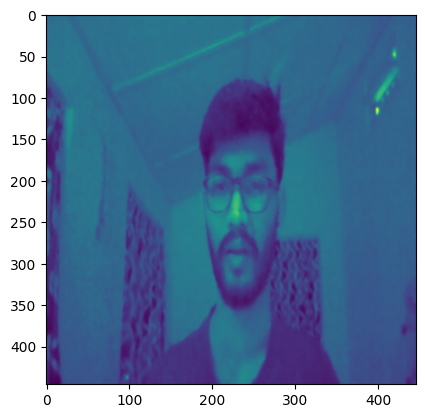

In [27]:
plt.imshow(output[0][10]);

In [29]:
# img_arr

In [6]:
im_arr[:, :4, :4].shape

(3, 4, 4)

In [5]:
kernel = np.random.uniform(0, 1, size=(3, 3, 3))

In [10]:
kernel.shape

(3, 3, 3)

In [6]:
kernel

array([[[0.99231953, 0.86907334, 0.00653064],
        [0.795522  , 0.04184462, 0.15757359],
        [0.99432102, 0.94901129, 0.46079363]],

       [[0.29274536, 0.62765364, 0.03263512],
        [0.1220371 , 0.25843836, 0.38809898],
        [0.9234832 , 0.68906586, 0.19236806]],

       [[0.04282213, 0.99942869, 0.20808346],
        [0.5020963 , 0.15814758, 0.3014388 ],
        [0.679774  , 0.36860231, 0.05191052]]])

In [7]:
np.sum(im_arr[:, :3, :3] * kernel)

np.float64(1144.2184354724213)

In [8]:
im_arr[:, :3, :3] * kernel

array([[[ 69.46236705,  60.8351335 ,   0.45714481],
        [ 55.68653997,   2.92912336,  11.03015128],
        [ 70.59679233,  67.37980149,  32.71634774]],

       [[ 36.00767923,  77.20139795,   4.01411947],
        [ 15.01056344,  31.7879182 ,  47.736175  ],
        [112.66495007,  84.06603549,  23.46890346]],

       [[  4.41067959, 102.94115533,  21.43259678],
        [ 51.71591905,  16.28920106,  31.04819655],
        [ 70.01672181,  37.96603834,   5.34678314]]])

In [11]:
kernels = np.random.uniform(0, 1, size=(32, 3, 3, 3))

In [14]:
kernels[0].shape

(3, 3, 3)

In [15]:
output_matrix = np.zeros((32, 7, 7), np.float32)

In [18]:
output_matrix[0]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Testing the fn

In [38]:
from cnn import Conv2D

convolution = Conv2D(3, 32, 3)
cal = convolution.apply_conv2d_batch(im1)

In [39]:
cal.shape

(1, 32, 446, 446)

In [40]:
cal.shape

(1, 32, 446, 446)

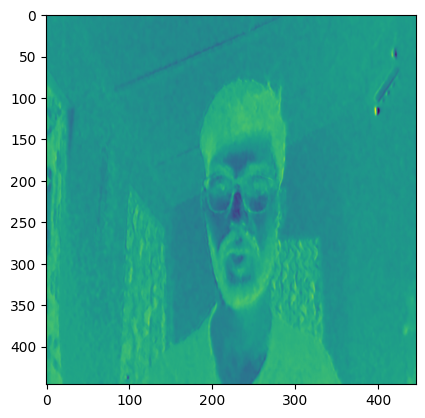

In [43]:
plt.imshow(cal[0][7]);

In [5]:
conv_img = np.moveaxis(cal, source=0, destination=2)

In [10]:
conv_img.shape

(718, 1278, 32)

In [11]:
conv_img[:,:, 0].shape

(718, 1278)

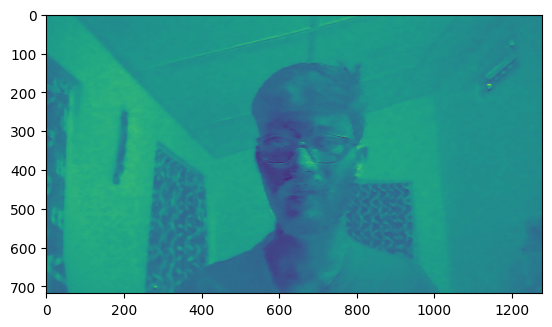

In [17]:
plt.imshow(conv_img[:, :, 8]);

In [ ]:
import torch.nn as nn
import torch
conv2d = nn.Conv2d(3, 32, 3)
im_tensor = torch.tensor(im_arr).float()
out_ts = conv2d(im_tensor)

In [ ]:
im_tensor = torch.tensor(im_arr).float()
out_ts = conv2d(im_tensor)

In [68]:
out_ts.shape

torch.Size([32, 718, 1278])

array([[1353.1333 , 1353.1333 , 1353.1333 , ..., 1242.0635 , 1247.9457 ,
        1248.5808 ],
       [1354.2852 , 1354.2852 , 1354.2852 , ..., 1237.1389 , 1242.9545 ,
        1239.0465 ],
       [1360.2712 , 1359.7941 , 1357.182  , ..., 1224.4935 , 1226.1454 ,
        1223.9093 ],
       ...,
       [ 670.54346,  664.4049 ,  651.5419 , ...,  750.7489 ,  757.3856 ,
         759.02185],
       [ 662.82806,  660.4249 ,  651.3894 , ...,  751.6387 ,  761.90173,
         766.4563 ],
       [ 656.70966,  653.8516 ,  645.4674 , ...,  752.7155 ,  763.1796 ,
         771.62384]], shape=(718, 1278), dtype=float32)

In [73]:
out_ts[0]

tensor([[0.0871, 0.0871, 0.0871,  ..., 0.6464, 0.9589, 0.1475],
        [0.1300, 0.1300, 0.1300,  ..., 1.2945, 1.5358, 0.9971],
        [0.9102, 0.8457, 0.7531,  ..., 1.3836, 0.6785, 1.0327],
        ...,
        [1.7943, 1.6237, 1.8737,  ..., 1.9039, 2.2955, 2.4550],
        [1.7087, 1.8329, 2.0231,  ..., 2.7811, 2.8441, 2.4181],
        [1.7150, 1.1848, 1.8356,  ..., 2.5634, 2.7939, 2.9555]],
       grad_fn=<SelectBackward0>)

In [70]:
out_ts[0].shape

torch.Size([718, 1278])

In [76]:
out = out_ts.detach().numpy()

In [61]:
out.shape

(32, 718, 1278)

In [62]:
out = np.moveaxis(out, source=0, destination=2)

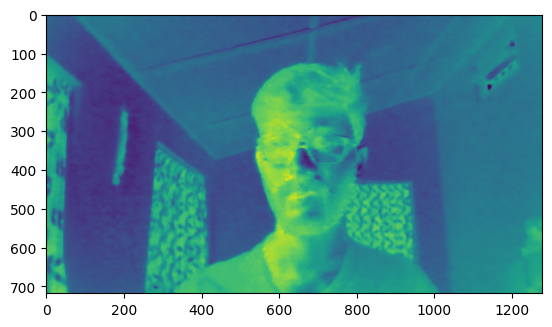

In [66]:
plt.imshow(out[:, :, 20]);

In [ ]:
kernel = np.random.uniform()

(3, 3, 3)

In [3]:
image_array.shape

(720, 1280, 3)

In [4]:
img = np.moveaxis(image_array, source=2, destination=0)

In [5]:
img.shape

(3, 720, 1280)

In [6]:
kernel = np.random.uniform(0, 1, size=(3, 3, 3))

In [7]:
slice_ = img[:, 0:3, 0:3]

In [12]:
slice_.shape

(3, 3, 3)

In [20]:
slice_ * kernel

array([[[20.34040924, 47.35485012, 10.51703414],
        [13.12636688, 42.22781325, 32.17589336],
        [24.002119  , 66.93974887,  6.48137771]],

       [[15.38580091, 25.58013086, 51.64183451],
        [15.89396917, 13.69817219, 94.79514425],
        [11.27701756, 71.36614722, 69.31463428]],

       [[84.28274223, 10.48918206, 46.26664882],
        [34.17816339, 11.78388497, 34.34482794],
        [12.92177715, 55.53103337, 89.20326185]]])

In [18]:
kernels = np.random.uniform(0, 1, size=(32, 3, 3, 3))
bias = np.random.uniform(0, 1, size=(32,))

In [19]:
img_reformed.shape

(3, 720, 1280)

In [20]:
img_reformed.strides

(1, 3840, 3)

In [21]:
shape = (3, 718, 1278, 3, 3)
strides = (
    img_reformed.strides[0],
    img_reformed.strides[1],
    img_reformed.strides[2],
    img_reformed.strides[1],
    img_reformed.strides[2]
)

receptive_fields = as_strided(img_reformed, shape=shape, strides=strides)

In [36]:
receptive_fields

array([[[[[ 70,  70,  70],
          [ 70,  70,  70],
          [ 71,  71,  71]],

         [[123, 123, 123],
          [123, 123, 123],
          [122, 122, 122]],

         [[103, 103, 103],
          [103, 103, 103],
          [103, 103, 103]]],


        [[[ 70,  70,  70],
          [ 70,  70,  70],
          [ 71,  71,  71]],

         [[123, 123, 123],
          [123, 123, 123],
          [122, 122, 122]],

         [[103, 103, 103],
          [103, 103, 103],
          [103, 103, 103]]],


        [[[ 70,  70,  70],
          [ 70,  70,  70],
          [ 71,  71,  71]],

         [[123, 123, 123],
          [123, 123, 123],
          [122, 122, 122]],

         [[103, 103, 103],
          [103, 103, 103],
          [103, 103, 103]]],


        ...,


        [[[ 83,  86,  87],
          [ 83,  84,  87],
          [ 82,  83,  84]],

         [[ 99, 100, 101],
          [ 99, 100, 101],
          [100, 101, 101]],

         [[ 86,  85,  86],
          [ 86,  87,  86],
          [ 

In [34]:
receptive_fields = np.transpose(receptive_fields, axes=(1, 2, 0, 3, 4))

In [37]:
receptive_fields = receptive_fields.reshape(718, 1278, -1)

In [47]:
receptive_fields

array([[[ 70,  70,  70, ..., 103, 103, 103],
        [ 70,  70,  70, ..., 103, 103, 103],
        [ 70,  70,  70, ..., 103, 103, 103],
        ...,
        [ 83,  86,  87, ...,  86,  87,  85],
        [ 86,  87,  88, ...,  87,  85,  85],
        [ 87,  88,  88, ...,  85,  85,  85]],

       [[ 70,  70,  70, ..., 103, 103, 103],
        [ 70,  70,  70, ..., 103, 103, 103],
        [ 70,  70,  70, ..., 103, 103, 103],
        ...,
        [ 83,  84,  87, ...,  88,  88,  86],
        [ 84,  87,  87, ...,  88,  86,  86],
        [ 87,  87,  87, ...,  86,  86,  84]],

       [[ 71,  71,  71, ..., 106, 106, 105],
        [ 71,  71,  71, ..., 106, 105, 105],
        [ 71,  71,  71, ..., 105, 105, 103],
        ...,
        [ 82,  83,  84, ...,  87,  87,  85],
        [ 83,  84,  84, ...,  87,  85,  85],
        [ 84,  84,  84, ...,  85,  85,  85]],

       ...,

       [[ 31,  31,  30, ...,  55,  55,  54],
        [ 31,  30,  29, ...,  55,  54,  54],
        [ 30,  29,  26, ...,  54,  54,  54

In [39]:
receptive_fields.shape

(718, 1278, 27)

In [41]:
kernels.shape

(32, 3, 3, 3)

In [42]:
kernels = kernels.reshape(32, -1)

In [43]:
kernels.shape

(32, 27)

In [45]:
kernels.T.shape

(27, 32)

In [50]:
output_flat = receptive_fields @ kernels.T

In [58]:
output_flat.shape

(718, 1278, 32)

In [60]:
output_flat.T.shape

(32, 1278, 718)

In [52]:
output_matrix = output_flat.T.reshape(32, 718, 1278)

In [54]:
output_matrix.shape

(32, 718, 1278)

In [55]:
output_matrix += bias.reshape(-1, 1, 1)

In [57]:
output_matrix.shape

(32, 718, 1278)

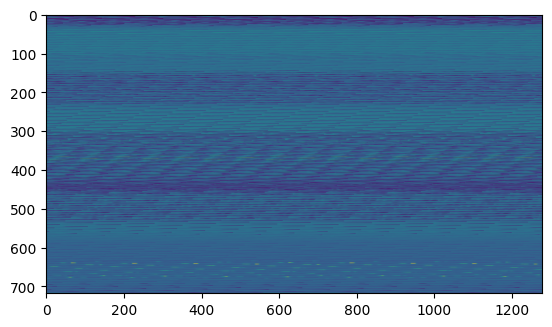

In [62]:
plt.imshow(output_matrix[10]);

# Add batching